# Familiar: A Study In Data Analysis

Welcome to *Familiar*, a startup in the new market of blood transfusion! You’ve joined the team because you appreciate the flexible hours and extremely intelligent team, but the overeager doorman welcoming you into the office is a nice way to start your workday (well, work-evening).

*Familiar* has fallen into some tough times lately, so you’re hoping to help them make some insights about their product and help move the needle (so to speak).

In [1]:
import pandas as pd
import numpy as np

# Load datasets
lifespans = pd.read_csv('familiar_lifespan.csv')
iron = pd.read_csv('familiar_iron.csv')

## What Can Familiar Do For You?

1. The Familiar team has provided us with some data on lifespans for subscribers to two different packages, the Vein Pack and the Artery Pack! This data has been loaded for you as a dataframe named `lifespans`. Use the `.head()` method to print out the first five rows and take a look!

In [2]:
lifespans.head()

,pack,lifespan
0,vein,76.255090
1,artery,76.404504
2,artery,75.952442
3,artery,76.923082
4,artery,73.771212


2. The first thing we want to know is whether Familiar's most basic package, the Vein Pack, actually has a significant impact on the subscribers. It would be a marketing goldmine if we can show that subscribers to the Vein Pack live longer than other people.

    Extract the life spans of subscribers to the `'vein'` pack and save the data into a variable called `vein_pack_lifespans`.

In [3]:
vein_pack_lifespans = lifespans.lifespan[lifespans.pack == 'vein']

3. Next, use `np.mean()` to calculate the average lifespan for Vein Pack subscribers and print the result. Is it longer than 73 years?

In [4]:
average_vein_pack_lifespan = np.mean(vein_pack_lifespans)
average_vein_pack_lifespan

76.16901335636044

4. We wouldd like to find out if the average lifespan of a Vein Pack subscriber is *significantly different* from the average life expectancy of `73` years.

    Import the statistical test from `scipy.stats` that we would use to test the following null and alternative hypotheses:

    * Null: The average lifespan of a Vein Pack subscriber is 73 years.
    * Alternative: The average lifespan of a Vein Pack subscriber is NOT 73 years.

In [5]:
from scipy.stats import ttest_1samp

5. Now that you have imported the function you need, run the significance test and print out the p-value! Is the average lifespan of a Vein Pack subscriber significantly longer than 73 years? Use a significance threshold of 0.05.

In [6]:
average_lifespan = 73
_, pval = ttest_1samp(vein_pack_lifespans, average_lifespan)

print(f'{pval:0.2e}')

5.97e-07


### Conclusion

The average lifespan of Vein Pack subscribers IS significantly different from 73 years.

## Upselling Familiar: Pumping Life Into The Company

6. In order to differentiate Familiar's different product lines, we would like to compare this lifespan data between our different packages. Our next step up from the Vein Pack is the Artery Pack.

    Let us get the lifespans of Artery Pack subscribers. Using the same `lifespans` dataset, extract the lifespans of subscribers to the Artery Pack and save them as `artery_pack_lifespans`.

In [7]:
artery_pack_lifespans = lifespans.lifespan[lifespans.pack == 'artery']

7. Use `np.mean()` to calculate the average lifespan for Artery Pack subscribers and print the result. Is it longer than for the Vein Pack?

In [8]:
average_artery_pack_lifespan = np.mean(artery_pack_lifespans)
average_artery_pack_lifespan

74.8736622351704

In [9]:
average_artery_pack_lifespan > average_vein_pack_lifespan

False

8. We would like to find out if the average lifespan of a Vein Pack subscriber is *significantly different* from the average life expectancy for the Artery Pack.

    Import the statistical test from `scipy.stats` that we would use to test the following null and alternative hypotheses:
    
    * Null: The average lifespan of a Vein Pack subscriber is equal to the average lifespan of an Artery Pack subscriber.
    * Alternative: The average lifespan of a Vein Pack subscriber is NOT equal to the average lifespan of an Artery Pack subscriber.

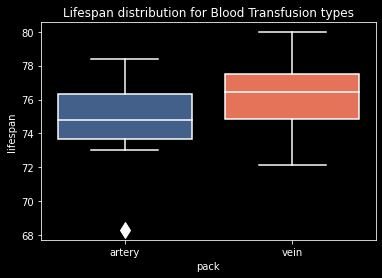

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

PROPS = {
    'boxprops': {'edgecolor':'white'},
    'medianprops': {'color':'white'},
    'whiskerprops': {'color':'white'},
    'capprops': {'color':'white'},
    'flierprops': {
                    'markerfacecolor':'white',
                    'markeredgecolor': 'white',
                    'markersize': 12
                }
}

VIBRANT_PRIMARY_COLORS = {
    'Sky': '#375E97',
    'Sunset': '#FB6542',
    'Sunflower': '#FFBB00',
    'Grass': '3F681C'
}

my_pal = {
    "artery": VIBRANT_PRIMARY_COLORS['Sky'],
    "vein": VIBRANT_PRIMARY_COLORS['Sunset']
}

plt.style.use('dark_background')

sns.boxplot(
    x=lifespans.pack,
    y=lifespans.lifespan,
    palette=my_pal,    
    order = [
        'artery',
        'vein'
        ],
    **PROPS)\
.set_title('Lifespan distribution for Blood Transfusion types')

plt.show()

In [11]:
from scipy.stats import ttest_ind

9. Now that you have imported the function you need, run the significance test and print out the p-value! Is the average lifespan of a Vein Pack subscriber significantly different from the average lifespan of an Artery Pack subscriber? Use a significance threshold of 0.05.

In [12]:
_, pval = ttest_ind(a=vein_pack_lifespans, b=artery_pack_lifespans)
print(f'{pval:0.2e}')

5.59e-02


### Conclusion

We conclude that the average lifespan of Vein Pack subscribers is not significantly different from the average lifespan of an Artery Pack subscriber.

## Side Effects: A Familiar Problem

10. The Familiar team has provided us with another dataset containing survey data about iron counts for our subscribers. This data has been pre-processed to categorize iron counts as "low", "normal", and "high" for each subscriber. Familiar wants to be able to advise potential subscribers about possible side effects of these packs and whether they differ for the Vein vs. the Artery pack.

    The data has been loaded for you as a dataframe named `iron`. Use the `.head()` method to print out the first five rows and take a look!

In [13]:
iron.head()

,pack,iron
0,vein,low
1,artery,normal
2,artery,normal
3,artery,normal
4,artery,high


11. Is there an association between the pack that a subscriber gets (Vein vs. Artery) and their iron level? Use the pandas `crosstab()` function to create a contingency table of the `pack` and `iron` columns in the `iron` data. Save the result as `xtab` and print it out.

In [14]:
levels = ['low', 'normal', 'high']
xtab = pd.crosstab(iron.pack, iron.iron)
xtab = xtab[levels]
xtab

iron,low,normal,high
pack,,,
artery,29,29,87
vein,140,40,20


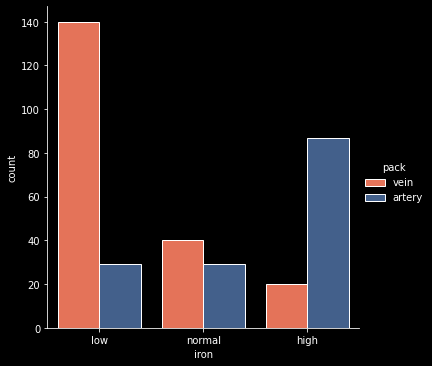

In [15]:
sns.catplot(
    kind='count',
    x='iron',
    hue='pack',
    data=iron,
    palette=my_pal,
    edgecolor='white'
)
plt.show()

12. We would like to find out if there is a significant association between which pack (Vein vs. Artery) someone subscribes to and their iron level.

    Import the statistical test from `scipy.stats` that we would use to test the following null and alternative hypotheses:

    * Null: There is NOT an association between which pack (Vein vs. Artery) someone subscribes to and their iron level.
    * Alternative: There is an association between which pack (Vein vs. Artery) someone subscribes to and their iron level.

In [16]:
from scipy.stats import chi2_contingency

13. Now that you have imported the function you need, run the significance test and print out the p-value! Is there a significant association between which pack (Vein vs. Artery) someone subscribes to and their iron level? Use a significance threshold of 0.05.

In [17]:
_, pval, _, _ = chi2_contingency(xtab)
print(f'{pval:0.2e}')

9.36e-25


### Conclusion

We conclude that there IS a significant association between pack and iron level.